# Machine Learning - SS20
## Tutorial 02 - PyTorch Basics + Linear Regression

* Lecturer: Prof. Dr. Volker Tresp
* Assistants: Christian Frey, Danyial Kazempour
---

In this tutorial we have to solve basic tasks in pytorch and also a linear regression problem using both, an analytical solution as well as iteratively learning a linear regression model. It is recommended to look up the basic learning procedure in pytorch and how the forward methods for learning a model can be used. Let's code!

#### Load dependencies

In [3]:
import torch
import torch.autograd as autograd
import matplotlib.pyplot as plt
import numpy as np
torch.__version__

'1.8.1+cpu'

### 1. Basics

#### a) Create a tensor of shape (2, 5, 5) with random numbers from a standard normal distribution! Print the shape!

In [10]:
t = np.random.rand(2,5,5)
t.shape

(2, 5, 5)

#### b) Create a tensor with floats from the following matrix

In [6]:
M = [[1, 2, 3], [4, 5, 6]]

In [13]:
t = np.array(M)
t = t.astype(np.float)
print(t.shape)
print(t)

(2, 3)
[[1. 2. 3.]
 [4. 5. 6.]]


#### c) Get the 2nd column and the 1st row of the tensor matrix created in b) respectively

In [17]:
col_2 = t[:,1]
print(col_2)

row_1 = t[0,:]
print(row_1)

[2. 5.]
[1. 2. 3.]


#### d) Reshape the following tensor to become two dimensional with shape = (9, 3) and get the mean per column

In [19]:
x = torch.randn(3, 3, 3)
print(x)

tensor([[[-0.5954, -0.8914, -1.4172],
         [ 0.9950, -0.6233,  1.3480],
         [ 0.3860,  0.2245, -0.5414]],

        [[-2.0364,  0.3691, -0.7559],
         [ 1.4312, -2.4544,  0.1835],
         [ 0.1177, -0.8576,  0.9310]],

        [[-0.0182,  0.0992, -2.7535],
         [-1.3388,  1.4872,  0.1755],
         [ 1.6772,  0.0261,  0.0613]]])


In [20]:
reshaped = torch.reshape(x, (9,3))
reshaped

tensor([[-0.5954, -0.8914, -1.4172],
        [ 0.9950, -0.6233,  1.3480],
        [ 0.3860,  0.2245, -0.5414],
        [-2.0364,  0.3691, -0.7559],
        [ 1.4312, -2.4544,  0.1835],
        [ 0.1177, -0.8576,  0.9310],
        [-0.0182,  0.0992, -2.7535],
        [-1.3388,  1.4872,  0.1755],
        [ 1.6772,  0.0261,  0.0613]])

#### e) Convert the following tensor into a numpy tensor

In [22]:
t = torch.ones(10)
print(t)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


In [23]:
np_tensor = t.cpu().detach().numpy()
np_tensor

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

### 2. Gradients with PyTorch

#### In the following cell, get the gradients of s with respect to x and y respectively. Play around with other functions/gradients

In [26]:
#calculate gradients
x = torch.tensor([1., 2., 3.]).requires_grad_()
y = torch.tensor([4., 5., 6.]).requires_grad_()
z = 2*x + y**2
s = z.sum()
#print(z.grad_fn)
#print(s.grad_fn)
type(z)

torch.Tensor

In [ ]:
<fill_in>

### 3. Simple Linear Regression

#### a) Solve the following linear regression problem analytically.  Compare the result for different values of n!

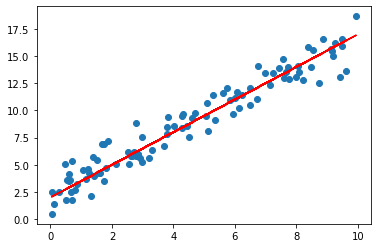

In [30]:
torch.manual_seed(3)

n = 100
d = 1
x = torch.FloatTensor(n, d).uniform_(0, 10)
noise = torch.FloatTensor(n, d).normal_(0, 1)

t = 2    #intercept 
m = 1.5  #slope


y = m*x + t + noise
r = m*x + t #regression line, just for plotting

plt.scatter(x, y)
plt.plot(x.numpy(), r.numpy(), 'r')
plt.show()

In [ ]:
<fill_in>

#### b) Fill in the missing parts of the LinearRegression model below.
The forward method should just return a linear function of x. <br>
Train the model to learn the parameters above! <br> See what happens for different learning rates!

In [36]:
import torch.nn as nn
import math
from torch.autograd import Variable

In [43]:
class LinearRegression(nn.Module):

    def __init__(self, in_dim, out_dim):

        super(LinearRegression, self).__init__() 
        # Calling Super Class's constructor
        self.linear = nn.Linear(in_dim, out_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

# input dimension
IN_DIM = 1
# output dimension
OUT_DIM = 1

learning_rate = 0.01
epochs = 100

x_train = x.cpu().detach().numpy()
y_train = y.cpu().detach().numpy()

#1. Create instance of model 
model = LinearRegression(IN_DIM, OUT_DIM)

#2. Define Loss
# mean squared error loss function
loss = nn.MSELoss()

#3. Setup Training with stochastic gradient descent and custom learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#4. Train the model
for epoch in range(epochs):
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward,
    #dont want to cummulate gradients
    optimizer.zero_grad()
    
    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss_val = loss(outputs, labels)
    print(loss_val)
    # get gradients w.r.t to parameters
    loss_val.backward()

    # update parameters
    optimizer.step()

    #print('epoch {}, loss {}'.format(epoch, loss_val.item()))

tensor(24.8368, grad_fn=<MseLossBackward>)
epoch 0, loss 24.836830139160156
tensor(5.6593, grad_fn=<MseLossBackward>)
epoch 1, loss 5.659317493438721
tensor(2.4383, grad_fn=<MseLossBackward>)
epoch 2, loss 2.4382517337799072
tensor(1.8927, grad_fn=<MseLossBackward>)
epoch 3, loss 1.8927420377731323
tensor(1.7959, grad_fn=<MseLossBackward>)
epoch 4, loss 1.7959223985671997
tensor(1.7744, grad_fn=<MseLossBackward>)
epoch 5, loss 1.7744008302688599
tensor(1.7656, grad_fn=<MseLossBackward>)
epoch 6, loss 1.7655688524246216
tensor(1.7589, grad_fn=<MseLossBackward>)
epoch 7, loss 1.7589271068572998
tensor(1.7527, grad_fn=<MseLossBackward>)
epoch 8, loss 1.7527153491973877
tensor(1.7466, grad_fn=<MseLossBackward>)
epoch 9, loss 1.7466366291046143


#### c) Print the learned parameters

In [49]:
print(f"Loss: {loss_val.item()}")
print(f"Parameters: {model.parameters()}")

Loss: 1.7466366291046143
Parameters: <generator object Module.parameters at 0x000001FC9D5F93C0>


#### d) Apply the trained model to x and plot the predictions along with the true values in a scatter plot

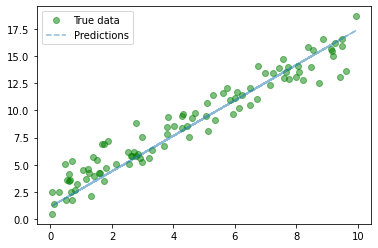

In [47]:
predictions = model(Variable(torch.from_numpy(x_train))).data.numpy()
#print(predictions)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predictions, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

# End of this Tutorial